In [1]:
import pandas as pd
import matplotlib.pyplot as plt#
import numpy as np
from corsikaio import CorsikaFile

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 16})


In [2]:
profile_24601 = pd.read_parquet("shower_24601/vertical_EAS_outputs/profile/profile.parquet")
profile_24602 = pd.read_parquet("shower_24602/vertical_EAS_outputs/profile/profile.parquet")
profile_42 = pd.read_parquet("shower_42/vertical_EAS_outputs/profile/profile.parquet")
profile_nomagnetic = pd.read_parquet("shower_nomagnetic/vertical_EAS_outputs/profile/profile.parquet")


In [3]:
profile_C7 = {}
profile_C7['electron'] = []
profile_C7['X'] = []

with CorsikaFile('C7_shower/DAT000001') as f:
    for e in f:
        profile_C7['X'].append(e.longitudinal['vertical_depth'])
        profile_C7['electron'].append(e.longitudinal['n_e_minus'])


profile_C7['electron'] = np.array(profile_C7['electron'])

C7_X = profile_C7['X'][0]

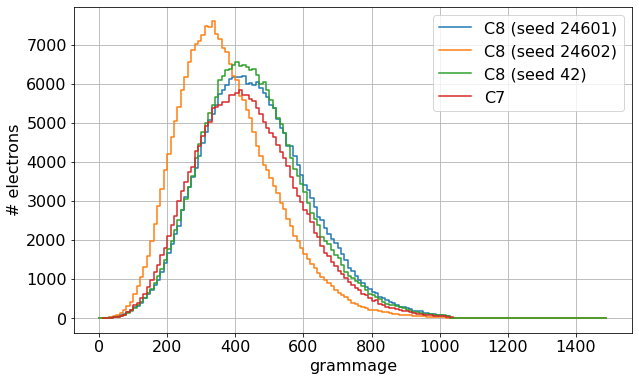

In [4]:
plt.step(profile_24601['X'][:150], profile_24601['electron'][:150], label='C8 (seed 24601)')
plt.step(profile_24602['X'][:150], profile_24602['electron'][:150], label='C8 (seed 24602)')
plt.step(profile_42['X'][:150], profile_42['electron'][:150], label='C8 (seed 42)')
#plt.step(profile_nomagnetic['X'][:150], profile_nomagnetic['electron'][:150], label='C8 (seed 24601, nomagnetic)')


plt.step(C7_X, profile_C7['electron'][0], label='C7')
plt.grid()
plt.legend()
plt.xlabel('grammage')
plt.ylabel('# electrons')
plt.savefig('longitudinal.png', bbox_inches='tight', dpi=200)


In [5]:
borders_24601 = pd.read_table("shower_24601/bin_border.txt").squeeze("columns").values
entries_24601 = pd.read_table("shower_24601/bin_entry.txt").squeeze("columns").values

borders_24602 = pd.read_table("shower_24602/bin_border.txt").squeeze("columns").values
entries_24602 = pd.read_table("shower_24602/bin_entry.txt").squeeze("columns").values

borders_42 = pd.read_table("shower_42/bin_border.txt").squeeze("columns").values
entries_42 = pd.read_table("shower_42/bin_entry.txt").squeeze("columns").values

borders_nomagnetic = pd.read_table("shower_nomagnetic/full_bin_border.txt").squeeze("columns").values
entries_nomagnetic = pd.read_table("shower_nomagnetic/full_bin_entry.txt").squeeze("columns").values

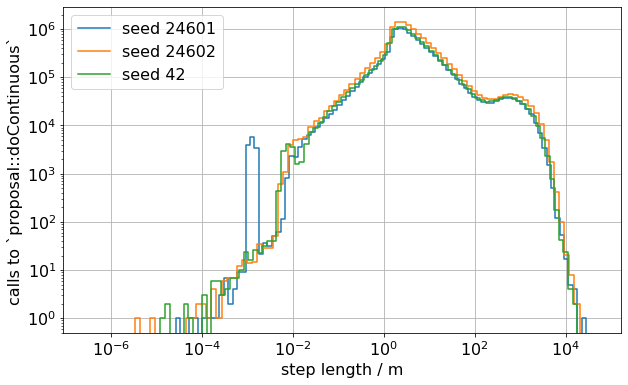

In [81]:
plt.step(borders_24601, entries_24601[:-1], where='post', label='seed 24601')
plt.step(borders_24602, entries_24602[:-1], where='post', label='seed 24602')
plt.step(borders_42, entries_42[:-1], where='post', label='seed 42')

#plt.step(borders_nomagnetic, entries_nomagnetic[:-1], where='post', label='24601 (no magnetic)')

plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.ylabel('calls to `proposal::doContinuous`')
plt.xlabel('step length / m')

plt.savefig('steplengths.png', bbox_inches='tight', dpi=200)

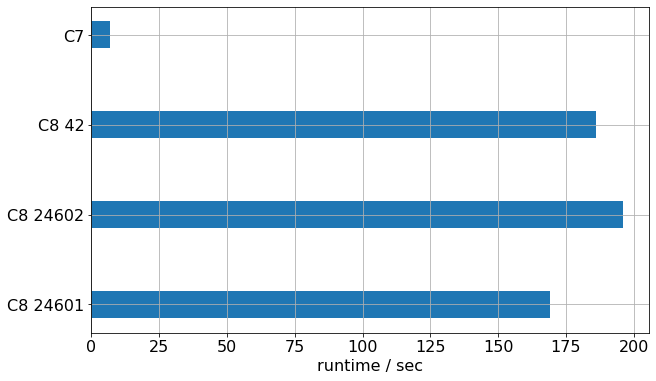

In [23]:
plt.barh(["C8 24601", "C8 24602", "C8 42", "C7"], [2*60+49, 3*60+16,  3*60 + 6, 7], height=0.3)
plt.grid()
plt.xlabel('runtime / sec')
plt.savefig('runtimes.png', bbox_inches='tight', dpi=200)


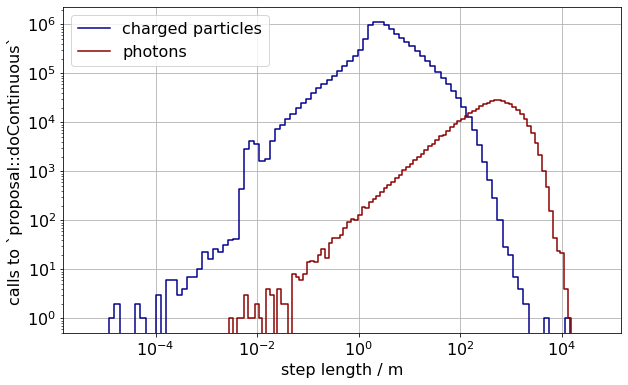

In [7]:
borders_42_full = pd.read_table("shower_42/full_bin_border.txt").squeeze("columns").values
entries_42_full = pd.read_table("shower_42/full_bin_entry.txt").squeeze("columns").values

borders_42_charged = pd.read_table("shower_42/charged_bin_border.txt").squeeze("columns").values
entries_42_charged = pd.read_table("shower_42/charged_bin_entry.txt").squeeze("columns").values

borders_42_photon = pd.read_table("shower_42/photon_bin_border.txt").squeeze("columns").values
entries_42_photon = pd.read_table("shower_42/photon_bin_entry.txt").squeeze("columns").values

#plt.step(borders_42_full, entries_42_full[:-1], where='post', label='seed 42 - full')
plt.step(borders_42_charged, entries_42_charged[:-1], where='post', label='charged particles', color='darkblue')
plt.step(borders_42_photon, entries_42_photon[:-1], where='post', label='photons', color='darkred')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('calls to `proposal::doContinuous`')
plt.grid()
plt.xlabel('step length / m')
plt.savefig('steplengths_separate_2.pdf', bbox_inches='tight', dpi=300)

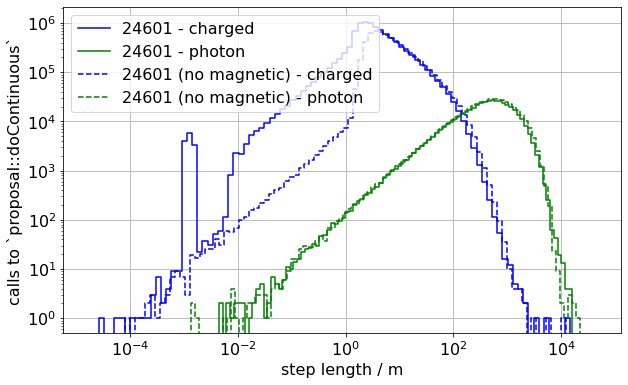

In [88]:
borders_nomagnetic_full = pd.read_table("shower_nomagnetic/full_bin_border.txt").squeeze("columns").values
entries_nomagnetic_full = pd.read_table("shower_nomagnetic/full_bin_entry.txt").squeeze("columns").values

borders_nomagnetic_charged = pd.read_table("shower_nomagnetic/charged_bin_border.txt").squeeze("columns").values
entries_nomagnetic_charged = pd.read_table("shower_nomagnetic/charged_bin_entry.txt").squeeze("columns").values

borders_nomagnetic_photon = pd.read_table("shower_nomagnetic/photon_bin_border.txt").squeeze("columns").values
entries_nomagnetic_photon = pd.read_table("shower_nomagnetic/photon_bin_entry.txt").squeeze("columns").values


borders_24601_full = pd.read_table("shower_24601/full_bin_border.txt").squeeze("columns").values
entries_24601_full = pd.read_table("shower_24601/full_bin_entry.txt").squeeze("columns").values

borders_24601_charged = pd.read_table("shower_24601/charged_bin_border.txt").squeeze("columns").values
entries_24601_charged = pd.read_table("shower_24601/charged_bin_entry.txt").squeeze("columns").values

borders_24601_photon = pd.read_table("shower_24601/photon_bin_border.txt").squeeze("columns").values
entries_24601_photon = pd.read_table("shower_24601/photon_bin_entry.txt").squeeze("columns").values

#plt.step(borders_24601_full, entries_24601_full[:-1], where='post', label='24601 - full', color='red')
plt.step(borders_24601_charged, entries_24601_charged[:-1], where='post', label='24601 - charged', color='blue')
plt.step(borders_24601_photon, entries_24601_photon[:-1], where='post', label='24601 - photon', color='green')

#plt.step(borders_nomagnetic_full, entries_nomagnetic_full[:-1], where='post', label='24601 (no magnetic) - full', color='red', linestyle='dashed')
plt.step(borders_nomagnetic_charged, entries_nomagnetic_charged[:-1], where='post', label='24601 (no magnetic) - charged', color='blue',  linestyle='dashed')
plt.step(borders_nomagnetic_photon, entries_nomagnetic_photon[:-1], where='post', label='24601 (no magnetic) - photon', color='green', linestyle='dashed')


plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel('calls to `proposal::doContinuous`')
plt.grid()
plt.xlabel('step length / m')
plt.savefig('steplengths_magnetic.png', bbox_inches='tight', dpi=200)

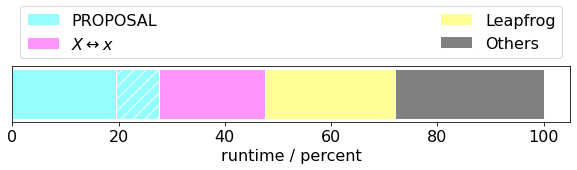

In [77]:
proposal_fixed = 8.1
proposal = 35.7 - proposal_fixed
grammage = 20
leapfrog = 24.5
others = 100 - proposal - grammage - leapfrog

y = [0]

height = 0.2

plt.barh(y, [proposal-proposal_fixed], color=(0.58,1,1), edgecolor='white', height=height, label='PROPOSAL')
plt.barh(y, [proposal_fixed], left=proposal-proposal_fixed, color=(0.58,1,1), edgecolor='white', height=height, hatch='//')
plt.barh(y, [grammage], left=proposal, color=(1,0.58,1), edgecolor='white', height=height, label=r'$X \leftrightarrow x$')
plt.barh(y, [leapfrog], left=proposal+grammage, color=(1, 1, 0.58), edgecolor='white', height=height, label='Leapfrog')
plt.barh(y, [others], left=proposal+grammage+leapfrog, color='grey', edgecolor='white', height=height, label='Others')
ax = plt.gca()
ax.get_yaxis().set_visible(False)

#define y-unit to x-unit ratio
ratio = 0.1

#get x and y limits
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()

#set aspect ratio
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)

#plt.legend()
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
plt.xlabel('runtime / percent')
plt.savefig('runtimes_percentage.png', bbox_inches='tight', dpi=200)
plt.show() 